### SKLearn Dataset Loading

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nFirst 10 rows of X:\n", X[:10])
print("\nFirst 10 rows of y:\n", y[:10])



Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 10 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

First 10 rows of y:
 [0 0 0 0 0 0 0 0 0 0]


### Spliting Dataset in SKLearn

In [13]:
from sklearn.model_selection import train_test_split

# Split dataset into 70% training data and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.3, random_state = 1
)

print(f'X.shape: {X.shape[0]}')
print(f'X_train.shape: {X_train.shape[0]}')
print(f'X_test.shape: {X_test.shape[0]}')

print(f'y.shape: {y.shape[0]}')
print(f'y_train.shape: {y_train.shape[0]}')
print(f'y_test.shape: {y_test.shape[0]}')

X.shape: 150
X_train.shape: 105
X_test.shape: 45
y.shape: 150
y_train.shape: 105
y_test.shape: 45


### Train the Model in SKLearn

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)

# Finding accuracy by comparing actual response values (y_test) with predicted response value (y_pred)
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

# Providing prediction data and the model will make prediction out of that data
prediction_data = [[5, 5, 3, 2], [2, 4, 3, 5]]

preds = classifier_knn.predict(prediction_data)
pred_species = [iris.target_names[p] for p in preds] 
print(f'Predictions: {pred_species}')

Accuracy: 0.9777777777777777
Predictions: ['versicolor', 'virginica']


### Model Persistence

In [4]:
import joblib

# Dump/store the model (classifier_knn)
joblib.dump(classifier_knn, 'models/iris_classifier_knn.joblib')

# Load/call the dumped_model (iris_classifier_knn)
loaded_model = joblib.load('models/iris_classifier_knn.joblib')

# Use loaded model for another prediction
another_prediction_data = [[4, 3.5, 1.3, 1], [4.1, 2.6, 1.4, 0.3]]
new_preds = loaded_model.predict(another_prediction_data)
new_pred_species = [iris.target_names[p] for p in new_preds] 
print(f'Predictions: {new_pred_species}')

Predictions: ['setosa', 'setosa']


### XGBoost Dataset Loading

In [5]:
from numpy import loadtxt
from xgboost import DMatrix

# Dataset loading 
dataset = loadtxt('../datasets/pima_indians_diabetes.csv', delimiter=',')

# Split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]

# Split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Create DMatrix for XGBoost
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

print(dtrain)

### Build (XGBoost) Model

In [9]:
from xgboost import train
from sklearn.metrics import accuracy_score

params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss'         # Logarithmic loss metric
}
num_round = 100  # Number of boosting rounds

model = train(params, dtrain, num_round)

print(f'Model: {model}')

# Make predictions for test data
pred = model.predict(dtest)
predictions = [round(value) for value in pred]
print(f'Predictions: {predictions}')

# Evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Model: <xgboost.core.Booster object at 0x11fd9e750>
Predictions: [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1]
Accuracy: 72.83%


### Save the Model

In [16]:
model.save_model('models/pima_indians_diabetes_xgboost_binary_logistic')

/Users/mac/Project/utopiq/fif/data/training/first_group/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:20:26] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


### If Error Happen

In [8]:
# If you got error message: You are running 32-bit Python on a 64-bit OS

# Check where your Python runnning by
import platform 
print(platform.architecture()) 

# Or
import struct 
print(struct.calcsize("P") * 8)

# Solve the problem by execute brew install libomp on your terminal to install libomp


('64bit', '')
64


### Model Comparation

(0, 'Random Forest')
(1, 'LR')
(2, 'KNN')
(3, 'StackingClassifier')
(4, 'BaggingClassifier')
(5, 'GradientBoostingClassifier')
(6, 'VotingClassifier')


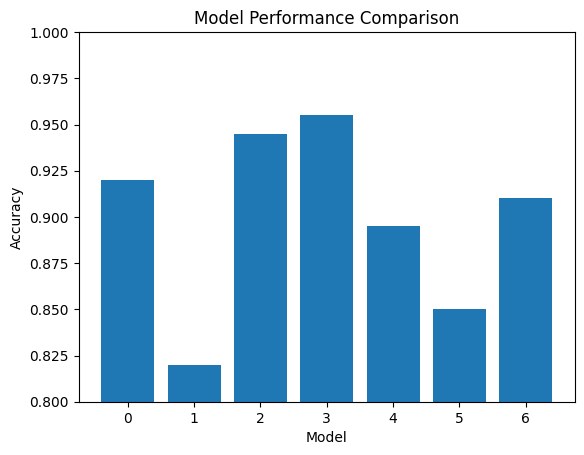

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)

XGBoostClassifiers = ['StackingClassifier', 'BaggingClassifier', 'GradientBoostingClassifier', 'VotingClassifier']
base_models = [('rf', rf), ('lr', lr), ('knn', knn)]
dc = DecisionTreeClassifier()
xgb = XGBClassifier(n_estimators=100, learning_rate=0.01, random_state=42)

acc = []
for classifier in enumerate(XGBoostClassifiers):
    # Define, train and evaluate the ensemble models
    i,cf = classifier
    if i == 0:
        ensemble = StackingClassifier(estimators=base_models, final_estimator=xgb)
    elif i == 1:
        ensemble = BaggingClassifier(estimator=dc, n_estimators=10)
    elif i == 2:
        ensemble = GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0, n_estimators=10)
    else :
        ensemble = VotingClassifier(estimators=base_models, voting='soft')

    ensemble.fit(X_train, y_train)
    y_pred = ensemble.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

# Train and evaluate individual models
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Visualize the performance comparison
emodels = ['Random Forest', 'LR', 'KNN'] + XGBoostClassifiers
models = enumerate(emodels)
imodels = []
for model in models:
    i,j = model 
    print (model)
    imodels.append(i)
accuracies = [accuracy_rf, accuracy_lr, accuracy_knn] + acc

plt.bar(imodels, accuracies)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()